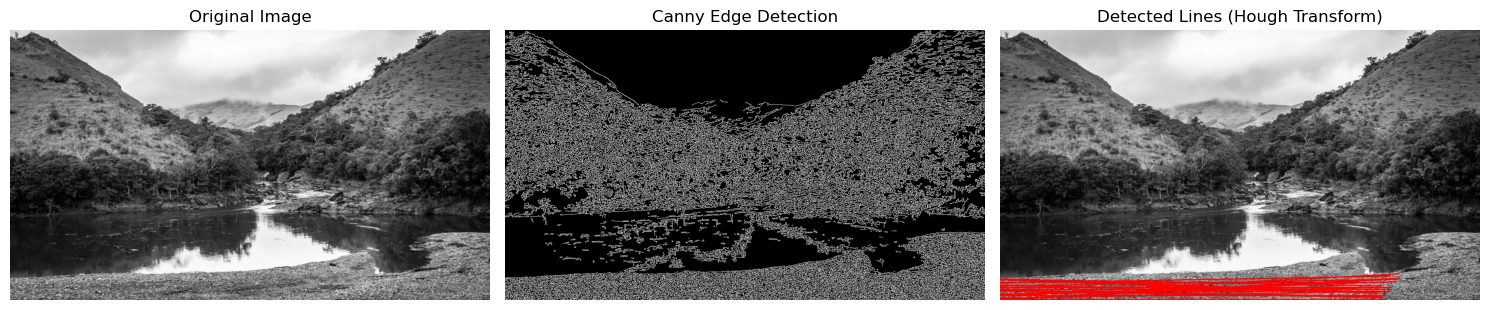

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def hough_lines_cartesian(image_path):
    # Load grayscale image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print("Error: Could not read image.")
        return

    # Edge detection using Canny
    edges = cv2.Canny(image, 50, 150, apertureSize=3)

    # Detect lines using Hough Transform
    lines = cv2.HoughLines(edges, 1, np.pi / 180, 150)

    # Convert image to color for drawing lines
    color_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

    if lines is not None:
        for i in range(min(len(lines), 20)):  # Limit to 20 lines
            rho, theta = lines[i][0]

            a, b = np.cos(theta), np.sin(theta)
            x0, y0 = a * rho, b * rho
            x1 = int(x0 + 1000 * (-b))
            y1 = int(y0 + 1000 * (a))
            x2 = int(x0 - 1000 * (-b))
            y2 = int(y0 - 1000 * (a))

            cv2.line(color_image, (x1, y1), (x2, y2), (0, 0, 255), 2)

    # Plot results
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.title("Original Image")
    plt.imshow(image, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.title("Canny Edge Detection")
    plt.imshow(edges, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.title("Detected Lines (Hough Transform)")
    plt.imshow(cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# Example usage
if __name__ == "__main__":
    hough_lines_cartesian('sample-image.jpg')
